In [1]:
from alpaca.models.model_library import Q_KSVZ, KSVZ_charge
from alpaca.decays import branching_ratio
from alpaca.experimental_data.measurements_exp import get_measurements

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12, 'text.usetex': True, 'font.family': 'serif', 'font.serif': ['Computer Modern Roman']})

In [3]:
fa = np.logspace(2.01, 8, 100)
couplings_fa = [Q_KSVZ.get_couplings({KSVZ_charge: 1}, f).match_run(1.2, 'VA_below') for f in fa]
couplings_4pifa = [Q_KSVZ.get_couplings({KSVZ_charge: 1}, 4*np.pi*f).match_run(1.2, 'VA_below') for f in fa]
couplings_1TeV = Q_KSVZ.get_couplings({KSVZ_charge: 1}, 1e3).match_run(1.2, 'VA_below')
couplings_10TeV = Q_KSVZ.get_couplings({KSVZ_charge: 1}, 1e4).match_run(1.2, 'VA_below')

In [4]:
br_fa = branching_ratio('B+ -> K+ eta pi+ pi-', 1.2, couplings_fa, fa)
br_4pifa = branching_ratio('B+ -> K+ eta pi+ pi-', 1.2, couplings_4pifa, fa)
br_1TeV = branching_ratio('B+ -> K+ eta pi+ pi-', 1.2, couplings_1TeV, fa)
br_10TeV = branching_ratio('B+ -> K+ eta pi+ pi-', 1.2, couplings_10TeV, fa)

In [10]:
m = get_measurements('B+ -> K+ eta pi+ pi-')

In [12]:
lim = float(m['BaBar'].get_sigma_right(np.array([1.2])))

/var/folders/fw/rb57_4ld5v32s9ffmw_s83d00000gn/T/ipykernel_47897/2365689714.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lim = float(m['BaBar'].get_sigma_right(np.array([1.2])))


(0.1, 1000.0)

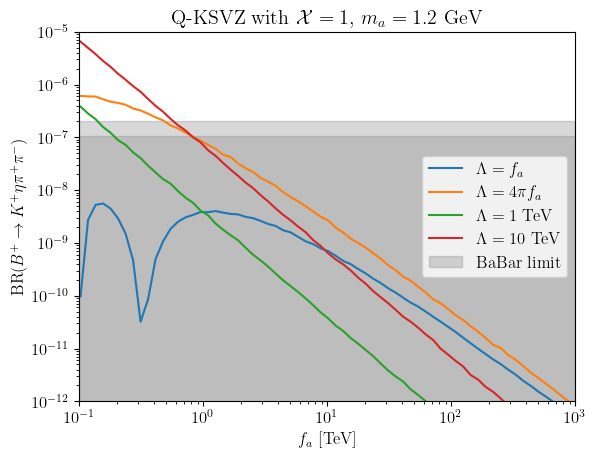

In [16]:
plt.loglog(fa/1000, br_fa, label=r'$\Lambda = f_a$')
plt.loglog(fa/1000, br_4pifa, label=r'$\Lambda = 4\pi f_a$')
plt.loglog(fa/1000, br_1TeV, label=r'$\Lambda = 1$ TeV')
plt.loglog(fa/1000, br_10TeV, label=r'$\Lambda = 10$ TeV')
plt.fill_between([1e-1, 1e3], [lim, lim], color='gray', alpha=0.3)
plt.fill_between([1e-1, 1e3], [2*lim, 2*lim], color='gray', alpha=0.3, label='BaBar limit')
plt.xlabel(r'$f_a$ [TeV]')
plt.ylabel(r'$\mathrm{BR}(B^+ \to K^+ \eta \pi^+ \pi^-)$')
plt.legend()
plt.title(r'Q-KSVZ with $\mathcal{X} = 1$, $m_a = 1.2$ GeV')
plt.ylim(1e-12, 1e-5)
plt.xlim(1e-1, 1e3)